In [1]:
import scanpy as sc

In [2]:
ad = sc.read('pancreas.h5ad', backup_url='https://www.dropbox.com/s/qj1jlm9w10wmt0u/pancreas.h5ad?dl=1')

In [3]:
ad_ref = ad[ad.obs.batch.isin(['0', '1', '2'])].copy()
ad_new = ad[ad.obs.batch.isin(['3'])].copy()

In [4]:
ad_ref.obs['cell_type'] = ad_ref.obs['celltype'].tolist()

In [5]:
sc.pp.pca(ad_ref)

In [ ]:
sc.pp.neighbors(ad_ref)

In [7]:
sc.tl.umap(ad_ref)

... storing 'cell_type' as categorical


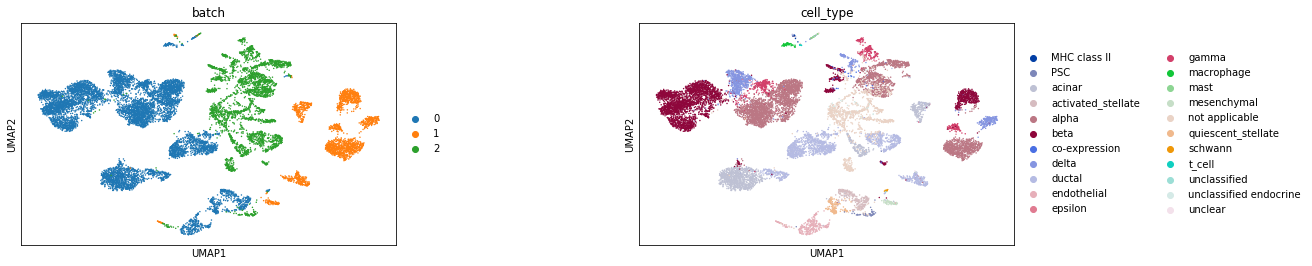

In [8]:
sc.pl.umap(ad_ref, color=['batch', 'cell_type'], wspace=.5)

In [ ]:
ad_joint = sc.tl.ingest(ad_new, ad_ref, obs='cell_type', k=15, return_joint=True)

... storing 'cell_type' as categorical
... storing 'celltype' as categorical
... storing 'louvain' as categorical
... storing 'sample' as categorical


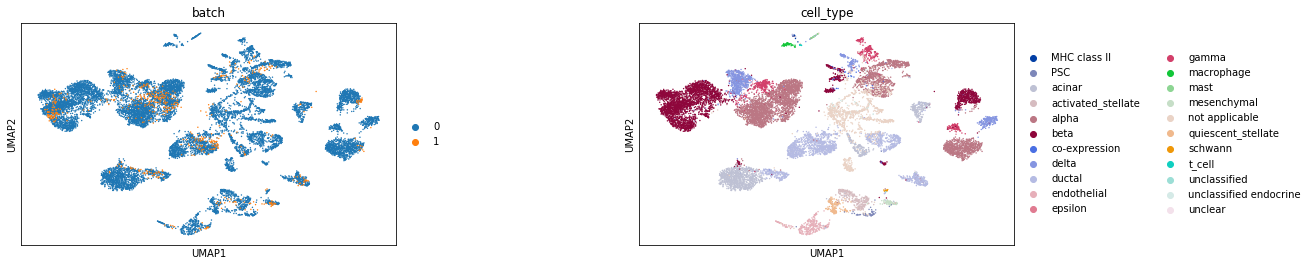

In [39]:
# this is a new batch obs - (0,1,2) -> 0; 3 -> 1
sc.pl.umap(ad_joint, color=['batch', 'cell_type'], wspace=.5)

In [40]:
ad_new_infer = ad_joint[ad_joint.obs['batch']=='1'].copy()

In [43]:
categories = ad_new_infer.obs['cell_type'].cat.categories.union(ad_new_infer.obs['celltype'].cat.categories)

In [51]:
ad_new_infer.obs['cell_type'].cat.set_categories(categories, inplace=True)

In [52]:
ad_new_infer.obs['celltype'].cat.set_categories(categories, inplace=True)

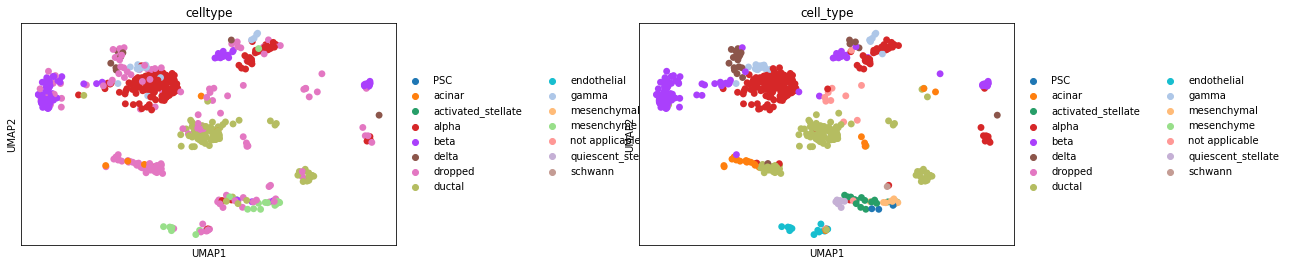

In [53]:
# celltype 
sc.pl.umap(ad_new_infer, color=['celltype', 'cell_type'], wspace=.5)